## Task 1. Floyd-Steinberg dithering

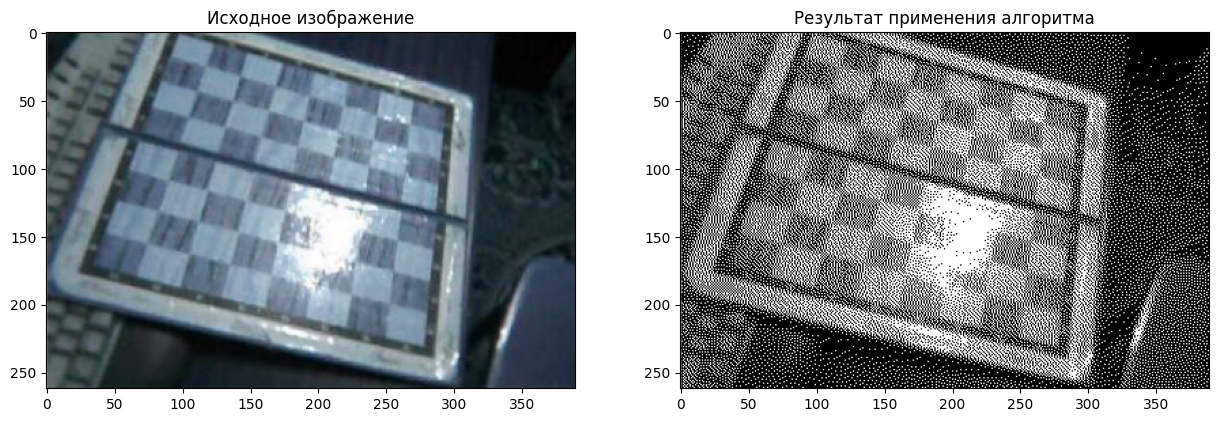

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def floyd_steinberg_dithering(img):
    new_img = np.zeros_like(img, dtype=np.uint8)

    # преобразование изображения в оттенки серого
    gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

    # применение алгоритма Флойда-Стейнберга
    height, width = gray.shape
    for y in range(height):
        for x in range(width):
            old_pixel = gray[y, x]
            new_pixel = np.round(old_pixel / 255) * 255
            new_img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < width - 1:
                gray[y, x+1] += error * 7/16
            if y < height - 1 and x > 0:
                gray[y+1, x-1] += error * 3/16
            if y < height - 1:
                gray[y+1, x] += error * 5/16
            if y < height - 1 and x < width - 1:
                gray[y+1, x+1] += error * 1/16

    return new_img

img = cv2.imread('data/test.png')
result= floyd_steinberg_dithering(img)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axs[0].imshow(img)
axs[0].set_title('Исходное изображение')
axs[1].imshow(result)
axs[1].set_title('Результат применения алгоритма')
plt.show()

## Task 2. Conjugate gradient method

In [10]:
import numpy as np

def conjugate_gradient_method(A, b, x0, max_iter, tol):
    x = x0
    r = b - np.dot(A, x)

    if np.linalg.norm(r) < tol:
        return x
    
    p = r
    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = np.dot(r.T, r) / np.dot(p.T, Ap)
        print(alpha)
        x = x + alpha * p
        r_new = r - alpha * Ap
        if np.linalg.norm(r_new) < tol:
            break
        beta = np.dot(r_new.T, r_new) / np.dot(r.T, r)
        p = r_new + beta * p
        r = r_new
    return x

In [11]:
import numpy as np

# Определим матрицу A и вектор b
A = np.array([[3, 2], [2, 5]])
b = np.array([7, 13])

# Определим начальное приближение и требуемую точность
x0 = np.array([0, 0])
tol = 1e-6

# Вызовем функцию conjugate_gradient_method
x = conjugate_gradient_method(A, b, x0, max_iter=1000, tol=tol)

print("Решение системы:")
print("x =", x[0])
print("y =", x[1])

0.1607669616519174
0.5654712260216848
Решение системы:
x = 0.8181818181818186
y = 2.2727272727272734


In [12]:
import numpy as np

def f(x):
    return x[0]**2 + x[1]**2 - 4

# задаем матрицу квадратичной формы и вектор линейных коэффициентов
A = np.array([[1, 0],
              [0, 1]])
b = np.array([0, 0])

# задаем начальную точку и максимальное число итераций
x0 = np.array([4, 4])
max_iter = 1000

# задаем точность
tol = 0.5

# вызываем функцию conjugate_gradient_method для минимизации функции
x_min = conjugate_gradient_method(A, b, x0, max_iter, tol)

print(f"Минимум функции равен {f(x_min)}, достигается в точке {x_min}")

1.0
Минимум функции равен -4.0, достигается в точке [0. 0.]


In [13]:
import numpy as np

def f(x):
    return 1/2* x[0]**2 + x[0] * x[1] + x[1]**2 - 2*x[1]

# задаем матрицу квадратичной формы и вектор линейных коэффициентов
A = np.array([[1/2, 1/2],
              [1/2, 1]])
b = np.array([0, 2])

# задаем начальную точку и максимальное число итераций
x0 = np.array([-2.3, 2.2])
max_iter = 1000

# задаем точность
tol = 10**(-5)

# вызываем функцию conjugate_gradient_method для минимизации функции
x_min = conjugate_gradient_method(A, b, x0, max_iter, tol)

print(f"Минимум функции равен {f(x_min)}, достигается в точке {x_min}")

0.9513797634691198
4.204419889502761
Минимум функции равен 0.0, достигается в точке [-4.  4.]
